## 🛑 Complete los siguientes datos 

- Nombre y Apellidos:  **Haizea Rodriguez**
- Entrega: **Práctica 03 -Image Processing**
- Fecha: **12/11/2021**
- Tiempo dedicado a la entrega: **10-12h**
- Principales dudas y dificultades encontrados en el desarrollo:

> Data augmentation no había mucha información respecto a como utilizarlo on the fly

> Los modelos a veces fallaban o daban errores, había que reiniciar el entorno y volvían a funcionar lo que hacía perder una gran cantidad de tiempo ya que había que volver a cargar los datos y llegar al final. 

> La carga de los datos era compleja, llevó bastante tiempo encontrar la forma correcta de cargar los gz hasta que un día en clase comentó un compañero que estabán en Mnist

> Los datos para ejecutar las arquitecturas han tenido que ser modificados y esta modficación me llevo bastante tiempo, comentandolo con algunos compañeros nos salía el mismo error y encontramos la forma de añadirle las capas necesarias para poder entrenarlo

> Ejecutar toda la práctica lleva demasiado tiempo, más de 30 minutos, aún teniendo la GPU inicializada por lo que realizarla lleva bastante tiempo



#Instrucciones Generales

**Laboratorio de IA**

**Contexto de la práctica, preliminares e instrucciones**

Este es el cuaderno que utilizarás como **plantilla** para entrega de la asignatura Laboratorio de IA del tema correpondiente.

La práctica está **alineada** con las sesiones de teoría y el ejemplo de código visto en el aula, por lo que es recomendable un repaso al material del tema previo a la implementación de la práctica. 

Por favor, **lee atentamente** el enunciado. Si tienes alguna duda, utiliza el foro o ponte en contacto con el profesor (pero no compartas código). 

Consideraciones generales sobre el código:
- Cuando se le pida que presente un valor o resultado, muéstrelo con el contexto y la precisión adecuados, es decir, "La tabla tiene 100 filas y 4 columnas" en lugar de mostrar "100 4" por pantalla o "precisión del 66,7%" en lugar de simplemente imprimir "0,66666666".
- Utilice tantas celdas (de texto o de código) como considere para dar una respuesta legible y clara a las preguntas planteadas.
- Mostrar resultados intermedios o finales (tablas, contenido de las variables...) que demuestren que la solución es correcta si fuera necesario.
- No olvide importar todas las librerías necesarias para la correcta ejecución del código, incluyendo la instalación de las mismas, si fuera necesario. 


**Para entregar el cuaderno:**
- Imprímelo en un archivo PDF con todas las secciones expandidas y todas las celdas ejecutadas, de forma que se pueda ver todo el código y se muestren todos los resultados.
- Guardar el cuaderno como archivo ipynb.

Envía ambos archivos en una carpeta zip a ALUD. Nombre los ficheros con su nombre, apellidos y el número de práctica.

**Evaluación:**  Esta práctica cuenta un 12.5% de la evaluación final de la asignatura.

En las indicaciones, hay instrucciones extra indicadas con el símbolo 🤖. No son requisitos para superar la práctica, sino acciones que puedes realizar para mejorar la calificación.

La calificación de los ejercicios se hará con los siguientes criterios:
- [9 a 10] puntos: La solución aportada cumple con los requisitos de forma excelente y existen aspectos positivos o extras (🤖) que avalan su excelencia.
- [7 a 9] puntos: La solución aportada cumple con los requisitos, pero algunas cuestiones menores son susceptibles de ser mejoradas, tales como: presentación de la solución, justificación de la decisión tomada, eficiencia del código...
- [5 a 7] puntos: Las soluciones aportadas no cumplen alguno de los requisitos, como por ejemplo: no se responde a una pregunta, no se aporta la solución a una parte...
- [1 a 5] puntos: La solución aportada no cumple con varios requisitos.
- [0] puntos: solución no aportada o solución plagiada.

La limpieza y la eficiencia del código, así como las explicaciones dadas serán tenidas en cuenta  para la evaluación.

**Plazo:** El plazo de entrega de la práctica son dos semanas tras la presentación de la misma en el aula.

Tenga presente que la práctica puede entregarse pasado el plazo dado, en cualquier momento del cuatrimestre, teniendo en cuenta que, la entrega pasado el plazo será evaluada sobre el 75% de la calificación.


# 🛑 Desarrollo a realizar

En las próximas celdas, tendrá que desarrollar un sistema de clasificación de imágenes de moda, haciendo uso del dataset Fashion-MNIST: [Dataset](https://github.com/zalandoresearch/fashion-mnist). El alumno probará diferentes arquitecturas y proporcionara el accuracy de cada una.

**Requisitos básicos**
 - Utilizar al menos 4 modelos própios.
 - Utilizar al menos 2 arquitecturas conocidas.
 - Hacer uso de data augmentation.

**Consideraciones deseables**
 - Incluir alguna métrica adicional para la evaluación de los modelos, como puede ser precision, recall o f1-score. Pista: la librería Scikit-learn incluye clases para hacerlo, por ejemplo [la siguiente clase](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

**🤖Requisitos extra**
 - Hacer un ablation study con alguno de los modelos propios. Un ablation study consiste en estudiar como cada una de las variables afecta al resultado final, haciendo experimentos con cada una de ellas por separado y mostrando los resultados. Habra que presentar una tabla mostrando como los cambios de cada variable estudiada afecta al resultado final.
 - Mostrar las activaciones de las capas convolucionales de uno de los modelos propios, un ejemplo puede encontrarse [aquí](https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0).



### Importar librerías

Intalación de todas las librerías y paquetes necesarios para realizar la práctica


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Rescaling
from keras import backend as K
from keras.utils import np_utils
import tensorflow as tf
from keras.layers import Input, Lambda, GlobalAveragePooling2D, Reshape
from keras.backend import resize_images
import numpy as np
import matplotlib.pyplot as plt


from keras.datasets import mnist

from keras.applications.mobilenet import MobileNet

from keras.applications.densenet import DenseNet121

from keras.models import Model

from sklearn.model_selection import train_test_split


### Carga del dataset y creación de los conjuntos de entrenamiento.

#### No usado pero otras maneras de cargar los datos 

Los ficheros están cargados en el mi unidad de drive. Poniendo el código que nos muestra la celda siguiente se realiza la lectura de los ficheros gz que en mi caso están metidos en una carpeta data en mi unidad del drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Método sacado de el GitHub compartido en el enunciado (utils). Se encarga de leer los fichero stanto de labels como de imagenes 

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

En mi caso los archivos están guardados dentro de mi unidad de drive en una carpeta data. Es por eso que poniendo esa ruta puedo acceder a ellos. 

In [ ]:
#x_train_full, y_train_full = load_mnist('/content/drive/MyDrive/data/', kind='train')
#x_test, y_test = load_mnist('/content/drive/MyDrive/data/', kind='t10k')

Opción si se suben los ficheros al collab (Recuerda que cada vez que se ejecute una nueva sesión se tienen que subir) 

In [ ]:
#Está comentado porque no se usa, se utiliza la otra forma de cargarlo 
#x_train_full, y_train_full = load_mnist('/content/', kind='train')
#x_test, y_test = load_mnist('/content/', kind='t10k')

### Lectura de datos desde MINIST

Los datos actualmente se encuentran cargados en MNIST y como su lectura es más sencilla desde aquí me limito a llamar al método load_data con los datos correctos FASHION 

In [ ]:
(x_train_full, y_train_full),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


### Preparar TRAIN, TEST, VAL

En algunas prácticas realizadas en clase no hemos separado en tres conjuntos, nos hemos quedado con dos test y train ya que son los esenciales para el correcto entrenamiento de los modelos. Si queremos perfeccionar o ser más precisios usamos validation

> TRAIN: La muestra de datos utilizada para ajustar el modelo.

> VALIDATE: Son datos que no han visto el modelo por lo que ayudan a realizar una evaluación del ajuste más precisa

> TEST: Conjunto de datos imparcial usada para la evaluación final

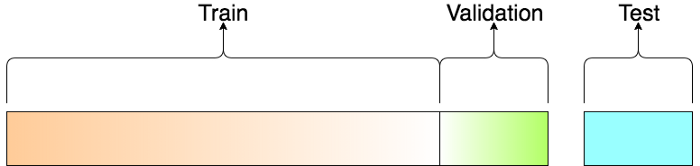

In [ ]:
print('x_train.shape: {}, y_train.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

x_train.shape: (60000, 28, 28), y_train.shape: (60000,)
x_test shape: (10000, 28, 28), y_test.shape: (10000,)


In [ ]:
print ("Pixel [1,1] de la segunda imagen:", x_train_full[1,1])
print ("Label de la imagen:", y_train_full[1])

Pixel [1,1] de la segunda imagen: [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
 215 254 231 160  45   0   0   0   0   0]
Label de la imagen: 0


In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train_full = x_train_full.reshape(x_train_full.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_full = x_train_full.reshape(x_train_full.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

En la práctica vamosa  trabajar con TRAIN, TEST y VALIDATION. En la siguiente celda se separan los datos creando los tres conjuntos. Validation sale de extraer un 20% del Training 

In [ ]:
# create validation set
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

x_train: (48000, 28, 28, 1), y_train: (48000,), x_val: (12000, 28, 28, 1), y_val: (12000,)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'val samples')

x_train shape: (48000, 28, 28, 1)
48000 train samples
10000 test samples
12000 val samples


In [ ]:
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
print (y_test[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Print que muestra el shape que tienen nuestras train, test y validation sets

In [ ]:
print('x_train.shape: {}, y_train.shape: {}'
      .format(x_train.shape, y_train.shape))
print('x_test.shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))
print('x_val.shape: {}, y_val.shape: {}'.format(x_val.shape, y_val.shape))

x_train.shape: (48000, 28, 28, 1), y_train.shape: (48000, 10)
x_test.shape: (10000, 28, 28, 1), y_test.shape: (10000, 10)
x_val.shape: (12000, 28, 28, 1), y_val.shape: (12000, 10)


In [ ]:
# Este dataset no se encuentra por defecto en keras los siguientes enlaces dan algunas pistas de como hacerlo: https://keras.io/examples/vision/image_classification_from_scratch/ y https://colab.research.google.com/notebooks/io.ipynb

Visualizar las imagenes, código sacado de la siguente página web: https://www.datacamp.com/community/tutorials/cnn-tensorflow-python


Text(0.5, 1.0, '(Label: Ankle boot)')

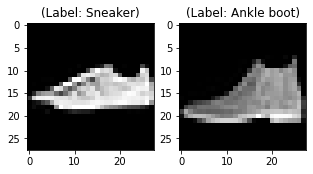

In [ ]:
label_dict = {0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (28,28))
curr_lbl = np.argmax(y_train[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0], (28,28))
curr_lbl = np.argmax(y_test[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

### Definición de nuevas métricas

No queremos medir solo accuracy, precision, f1_score son otras métricas que nos interesa. De este enlace han salido los métodos utilizados para las métricas: 

https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

**Información de estas métricas de evaluación**

**Recall** es el número de elementos identificados correctamente como positivos del total de positivos verdaderos.

Con la métrica de **precisión** podemos medir la calidad del modelo de machine learning en tareas de clasificación. Es el porcentaje total de elementos clasificados correctamente.

Está claro que recall nos da información sobre el rendimiento de un clasificador con respecto a falsos negativos (cuántos fallaron), mientras que la precisión nos proporciona información sobre su rendimiento con respecto a los falsos positivos (cuántos capturados).

El valor **F1** se utiliza para combinar las medidas de precision y recall en un sólo valor.


En la siguiente página aparece un ejemplo de como se peuden evaluar estas métricas: https://sitiobigdata.com/2019/01/19/machine-learning-metrica-clasificacion-parte-3/#


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Creación de los modelos y entrenamiento 


    

### 1º modelo - el más básico que podemos encontrar 

INPUT --> Convolucional --> Función de activación --> Pooling --> FC 

In [ ]:
model = Sequential()
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 strides = 1,
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
batch_size = 256
epochs = 10

history1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 36s 28ms/step - loss: 2.3096 - accuracy: 0.0855 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 14.1276 - val_accuracy: 0.1010 - val_f1_m: 0.0998 - val_precision_m: 0.1010 - val_recall_m: 0.0986
Epoch 2/10
188/188 [==============================] - 5s 25ms/step - loss: 2.2751 - accuracy: 0.1377 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 10.5640 - val_accuracy: 0.2587 - val_f1_m: 0.2588 - val_precision_m: 0.2617 - val_recall_m: 0.2560
Epoch 3/10
188/188 [==============================] - 5s 25ms/step - loss: 2.2401 - accuracy: 0.1944 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 9.7645 - val_accuracy: 0.3931 - val_f1_m: 0.3935 - val_precision_m: 0.3956 - val_recall_m: 0.3916
Epoch 4/10
188/188 [==============================] - 5s 25ms/step - loss: 2.2012 - accuracy: 0.2435 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.

Evaluación del modelo (replique esta sección por cada modelo)

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)

Test loss: 1.7017558813095093
Test accuracy: 0.6111000180244446
Test f1_score: 0.0
Test precision: 0.0
Test recall: 0.0


{'loss': [2.309587001800537, 2.2750940322875977, 2.2400524616241455, 2.201237678527832, 2.1547536849975586, 2.102961540222168, 2.040482997894287, 1.9699913263320923, 1.894838809967041, 1.8114533424377441], 'accuracy': [0.08547917008399963, 0.13770833611488342, 0.19437499344348907, 0.2434791624546051, 0.2906875014305115, 0.3329791724681854, 0.36500000953674316, 0.39004167914390564, 0.4099999964237213, 0.43185415863990784], 'f1_m': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.13941488659475e-05, 0.0004967298591509461, 0.007212693337351084], 'precision_m': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005319148302078247, 0.06382977962493896, 0.5673758387565613], 'recall_m': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0777924873982556e-05, 0.0002493351057637483, 0.003636136883869767], 'val_loss': [14.127604484558105, 10.564034461975098, 9.764500617980957, 9.820927619934082, 10.959537506103516, 12.739242553710938, 15.461654663085938, 18.636409759521484, 22.152944564819336, 25.73480796813965], 'val_accuracy': [0

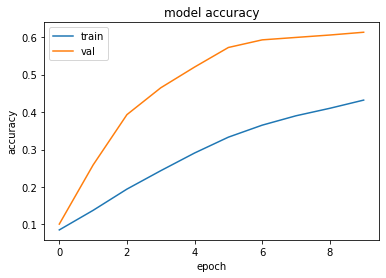

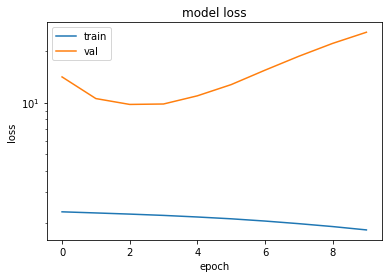

In [ ]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

history = history1.history

print (history)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale("log")
plt.legend(['train', 'val'], loc='upper left')
plt.show()


### 2º Modelo - Básico agrandando

La idea es replicar la estructura básica varias veces añadiendo profundidad. Metemos más capas centrandonos en las convoluciones 

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='relu', input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(Conv2D(64,  kernel_size=(3,3), strides = 1, activation='relu', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(128, kernel_size=(3,3),strides = 1, activation='relu', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [ ]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 22, 22, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 64)       256       
 hNormalization)                                      

In [ ]:
batch_size = 256
epochs = 10

history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 22s 105ms/step - loss: 2.6367 - accuracy: 0.2518 - f1_m: 0.2083 - precision_m: 0.3189 - recall_m: 0.1549 - val_loss: 78.7718 - val_accuracy: 0.1153 - val_f1_m: 0.1154 - val_precision_m: 0.1154 - val_recall_m: 0.1153
Epoch 2/10
188/188 [==============================] - 18s 97ms/step - loss: 1.7059 - accuracy: 0.4507 - f1_m: 0.4265 - precision_m: 0.5811 - recall_m: 0.3376 - val_loss: 318.6425 - val_accuracy: 0.1208 - val_f1_m: 0.1209 - val_precision_m: 0.1209 - val_recall_m: 0.1209
Epoch 3/10
188/188 [==============================] - 18s 97ms/step - loss: 1.3479 - accuracy: 0.5541 - f1_m: 0.5383 - precision_m: 0.6747 - recall_m: 0.4483 - val_loss: 592.1868 - val_accuracy: 0.2033 - val_f1_m: 0.2035 - val_precision_m: 0.2035 - val_recall_m: 0.2035
Epoch 4/10
188/188 [==============================] - 18s 97ms/step - loss: 1.1690 - accuracy: 0.6075 - f1_m: 0.5962 - precision_m: 0.7145 - recall_m: 0.5118 - val_loss: 736.2166 - val_accur

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)

Test loss: 0.6336977481842041
Test accuracy: 0.7709000110626221
Test f1_score: 0.7640633583068848
Test precision: 0.8576465845108032
Test recall: 0.6911941170692444


{'loss': [2.6366958618164062, 1.7058937549591064, 1.3478764295578003, 1.168978214263916, 1.05397367477417, 0.9779388904571533, 0.9134730696678162, 0.8673955798149109, 0.8284880518913269, 0.7960294485092163], 'accuracy': [0.25181248784065247, 0.4507499933242798, 0.5541250109672546, 0.6074583530426025, 0.6413750052452087, 0.6630416512489319, 0.682979166507721, 0.6963541507720947, 0.7094166874885559, 0.7199375033378601], 'f1_m': [0.2082536220550537, 0.4264884293079376, 0.5382744669914246, 0.5961961150169373, 0.6333544254302979, 0.6558448076248169, 0.6779567003250122, 0.6927619576454163, 0.7053385972976685, 0.7149770259857178], 'precision_m': [0.31887105107307434, 0.5810779929161072, 0.6746952533721924, 0.7145090103149414, 0.742827296257019, 0.7552543878555298, 0.775017499923706, 0.7870570421218872, 0.7957620024681091, 0.8037227988243103], 'recall_m': [0.15492020547389984, 0.3375997245311737, 0.44828373193740845, 0.5118434429168701, 0.5522980093955994, 0.579870343208313, 0.6028299331665039

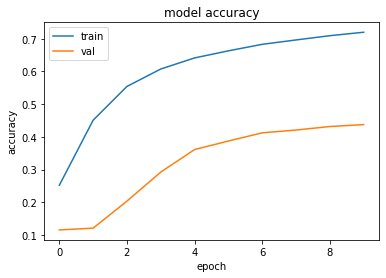

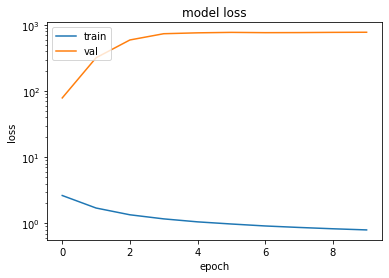

In [ ]:
history = history2.history

print (history)

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale("log")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 3º Modelo - Dropout + MaxPooling

Añadimos Dropout al modelo y lo completamos todavía más con capas del estilo Max Pooling


El droput es una técnica utilizada para evitar el overfitting. Funciona estableciendo aleatoriamente los bordes de salida de las unidades ocultas (neuronas que componen las capas ocultas) a 0 en cada actualización de la fase de entrenamiento. 

(https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab) 

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
model3.add(BatchNormalization())
model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPooling2D())
model3.add(Dropout(0.4))
model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))

model3.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Dense(10, activation='softmax'))




In [ ]:

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [ ]:
batch_size = 128
epochs = 10

history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 16s 37ms/step - loss: 2.8919 - accuracy: 0.1278 - f1_m: 0.0535 - precision_m: 0.1372 - recall_m: 0.0334 - val_loss: 69.4140 - val_accuracy: 0.1245 - val_f1_m: 0.1246 - val_precision_m: 0.1247 - val_recall_m: 0.1246
Epoch 2/10
375/375 [==============================] - 13s 36ms/step - loss: 2.6030 - accuracy: 0.1791 - f1_m: 0.0881 - precision_m: 0.2228 - recall_m: 0.0552 - val_loss: 165.8212 - val_accuracy: 0.2103 - val_f1_m: 0.2104 - val_precision_m: 0.2104 - val_recall_m: 0.2104
Epoch 3/10
375/375 [==============================] - 14s 36ms/step - loss: 2.3772 - accuracy: 0.2304 - f1_m: 0.1279 - precision_m: 0.3048 - recall_m: 0.0813 - val_loss: 169.0849 - val_accuracy: 0.2544 - val_f1_m: 0.2546 - val_precision_m: 0.2546 - val_recall_m: 0.2546
Epoch 4/10
375/375 [==============================] - 13s 35ms/step - loss: 2.1839 - accuracy: 0.2766 - f1_m: 0.1771 - precision_m: 0.3869 - recall_m: 0.1154 - val_loss: 169.0160 - val_accura

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)

Test loss: 1.3080830574035645
Test accuracy: 0.545199990272522
Test f1_score: 0.44146251678466797
Test precision: 0.7658759951591492
Test recall: 0.31409743428230286


{'loss': [2.8918511867523193, 2.602994203567505, 2.3771603107452393, 2.183881998062134, 2.0243897438049316, 1.8891944885253906, 1.7747851610183716, 1.6807934045791626, 1.5902888774871826, 1.5107218027114868], 'accuracy': [0.1277708262205124, 0.17906250059604645, 0.2304375022649765, 0.27664583921432495, 0.3242291808128357, 0.3657916784286499, 0.4013333320617676, 0.43174999952316284, 0.4626041650772095, 0.48527082800865173], 'f1_m': [0.05349263548851013, 0.08813189715147018, 0.12791171669960022, 0.17714820802211761, 0.22667990624904633, 0.2735942304134369, 0.31952613592147827, 0.3542684018611908, 0.39593741297721863, 0.42341044545173645], 'precision_m': [0.1371752917766571, 0.2228420376777649, 0.3047664761543274, 0.3868613541126251, 0.4502066969871521, 0.5023325085639954, 0.5501571297645569, 0.5758812427520752, 0.6126072406768799, 0.6282468438148499], 'recall_m': [0.03337499871850014, 0.05518750101327896, 0.08129166811704636, 0.11537499725818634, 0.15210416913032532, 0.1887291669845581, 

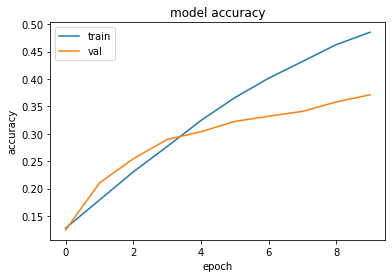

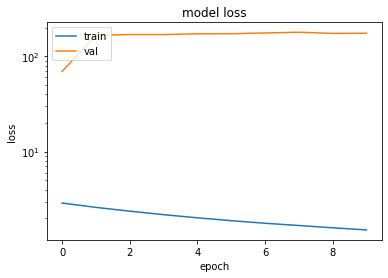

In [ ]:
history = history3.history

print (history)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale("log")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 4º Modelo -  usando una métrica diferente a relu 

Hay distintas funciones de activación https://www.tensorflow.org/api_docs/python/tf/keras/activations en este enlace podemos ver algunas de ellas. 

Utilizan distintas formulas por ejemplo sigmoid tiene la siguiente --> Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).

In [ ]:
model4 = Sequential()

model4.add(Conv2D(16, kernel_size=3, activation='sigmoid', padding='same', input_shape=input_shape))
model4.add(BatchNormalization())
model4.add(Conv2D(16, kernel_size=3, activation='sigmoid', padding='same'))


model4.add(MaxPooling2D())
model4.add(Dropout(0.5))
model4.add(Conv2D(32, kernel_size=3, activation='sigmoid', padding='same'))


model4.add(Conv2D(64, kernel_size=3, activation='sigmoid', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D())
model4.add(Dropout(0.4))

model4.add(Conv2D(128, kernel_size=3, activation='sigmoid', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(256, kernel_size=3, activation='sigmoid', padding='same'))

model4.add(MaxPooling2D())
model.add(Dropout(0.3))

model4.add(Flatten())
model4.add(Dense(256, activation='sigmoid'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))
model4.add(Dense(10, activation='softmax'))




In [ ]:
model42 = Sequential()

model42.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='sigmoid', input_shape=input_shape))
model42.add(Conv2D(64, (3, 3), activation='sigmoid'))

model42.add(Conv2D(64,  kernel_size=(3,3), strides = 1, activation='sigmoid', input_shape=(32, 32, 3)))
model42.add(BatchNormalization())
model42.add(Conv2D(64, (3, 3), activation='sigmoid'))
model42.add(BatchNormalization())

model42.add(Conv2D(128, kernel_size=(3,3),strides = 1, activation='sigmoid', input_shape=(32, 32, 3)))
model42.add(BatchNormalization())
model42.add(Conv2D(64, (3, 3), activation='sigmoid'))
model42.add(BatchNormalization())

model42.add(Flatten())
model42.add(Dense(128, activation='sigmoid'))
model42.add(Dropout(0.5))
model42.add(Dense(num_classes, activation='softmax'))

In [ ]:
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
model42.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_11 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)       

In [ ]:
batch_size = 256
epochs = 10

history4 = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 11s 47ms/step - loss: 0.7538 - accuracy: 0.7226 - f1_m: 0.7130 - precision_m: 0.7943 - recall_m: 0.6513 - val_loss: 2.3996 - val_accuracy: 0.1753 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
188/188 [==============================] - 8s 43ms/step - loss: 0.4842 - accuracy: 0.8216 - f1_m: 0.8189 - precision_m: 0.8605 - recall_m: 0.7814 - val_loss: 0.9657 - val_accuracy: 0.6776 - val_f1_m: 0.6333 - val_precision_m: 0.8594 - val_recall_m: 0.5020
Epoch 3/10
188/188 [==============================] - 8s 43ms/step - loss: 0.4061 - accuracy: 0.8496 - f1_m: 0.8504 - precision_m: 0.8806 - recall_m: 0.8222 - val_loss: 0.8089 - val_accuracy: 0.7290 - val_f1_m: 0.7292 - val_precision_m: 0.7971 - val_recall_m: 0.6722
Epoch 4/10
188/188 [==============================] - 8s 43ms/step - loss: 0.3665 - accuracy: 0.8656 - f1_m: 0.8660 - precision_m: 0.8926 - recall_m: 0.8409 - val_loss: 1.2335 - val_accu

In [ ]:
batch_size = 256
epochs = 10

history42 = model42.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 23s 111ms/step - loss: 0.7022 - accuracy: 0.7549 - f1_m: 0.7455 - precision_m: 0.8328 - recall_m: 0.6765 - val_loss: 2.8051 - val_accuracy: 0.1025 - val_f1_m: 0.1029 - val_precision_m: 0.1055 - val_recall_m: 0.1004
Epoch 2/10
188/188 [==============================] - 19s 101ms/step - loss: 0.5187 - accuracy: 0.8194 - f1_m: 0.8149 - precision_m: 0.8705 - recall_m: 0.7664 - val_loss: 0.7155 - val_accuracy: 0.7612 - val_f1_m: 0.7581 - val_precision_m: 0.8399 - val_recall_m: 0.6911
Epoch 3/10
188/188 [==============================] - 20s 107ms/step - loss: 0.4623 - accuracy: 0.8384 - f1_m: 0.8362 - precision_m: 0.8800 - recall_m: 0.7967 - val_loss: 0.5555 - val_accuracy: 0.8029 - val_f1_m: 0.7991 - val_precision_m: 0.8571 - val_recall_m: 0.7487
Epoch 4/10
188/188 [==============================] - 19s 101ms/step - loss: 0.4212 - accuracy: 0.8531 - f1_m: 0.8510 - precision_m: 0.8866 - recall_m: 0.8183 - val_loss: 0.6061 - val_accuracy:

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)

Test loss: 1.0693368911743164
Test accuracy: 0.7411999702453613
Test f1_score: 0.7434034943580627
Test precision: 0.7578054070472717
Test recall: 0.7299321293830872


In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model42.evaluate(x_test, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)

Test loss: 8.221040725708008
Test accuracy: 0.10000000149011612
Test f1_score: 0.10013976693153381
Test precision: 0.10013977438211441
Test recall: 0.10013977438211441


**Conclusión** obtenida al comparar los resutlados del modelo 2 y 3 (función RELU) con el 4 y el 42 (función SIGMOID)

-

Estos resultados indican que el problema puede estar en la función de activación. Ambos modelos empeoran los resultados obtenidos en el 2 y el 3 si los replicamos usando otra función de activación. 

En estos casos concretos podemos decir que relu funciona mejor que sigmoid. Podría ser interesante repetir esta expermientación con un diversas funciones y hacer la comparativa total de resultados.

{'loss': [0.7538155913352966, 0.484150230884552, 0.40611040592193604, 0.3664926290512085, 0.34129130840301514, 0.32253697514533997, 0.3035147190093994, 0.28948265314102173, 0.27830708026885986, 0.2738892734050751], 'accuracy': [0.7225624918937683, 0.8216041922569275, 0.8496041893959045, 0.8655624985694885, 0.8757916688919067, 0.882687509059906, 0.8898333311080933, 0.8938541412353516, 0.8997083306312561, 0.9002500176429749], 'f1_m': [0.7129613161087036, 0.8189188241958618, 0.8503633141517639, 0.8659723401069641, 0.8749819993972778, 0.8818983435630798, 0.8896821737289429, 0.8942453265190125, 0.9003466963768005, 0.9009666442871094], 'precision_m': [0.7943241596221924, 0.8604985475540161, 0.8806356191635132, 0.892630934715271, 0.898182213306427, 0.9034690856933594, 0.9096251726150513, 0.9131749868392944, 0.9182474613189697, 0.9177669882774353], 'recall_m': [0.6513463854789734, 0.7813746929168701, 0.8222240805625916, 0.8409450054168701, 0.8530377149581909, 0.8614112138748169, 0.870678186416

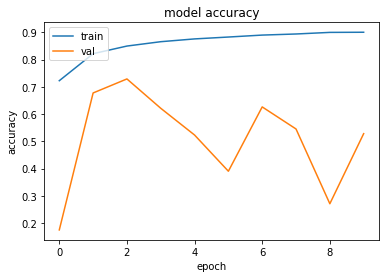

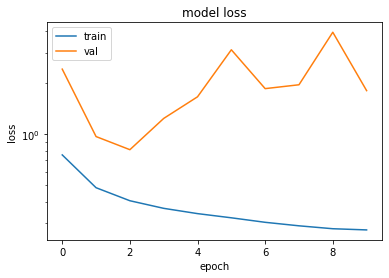

In [ ]:
history = history4.history

print (history)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale("log")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Arquitecturas 

### Cambios en x_test

Para que todo funcione correctamente, a causa de unos errores que estaba teniendo me he dado cuenta que tenia que arreglar el shape de mis datos. Los datos tienen que tener 3 capas, al final tenemos que tener (28,28,3)




In [ ]:
x_train_2 = (np.repeat((x_train/x_train.max()).astype("float32")[..., np.newaxis],3,-1))[:,:,:,0]
x_test_2 = (np.repeat((x_test/x_test.max()).astype("float32")[..., np.newaxis],3,-1))[:,:,:,0]
x_val_2 = (np.repeat((x_val/x_val.max()).astype("float32")[..., np.newaxis],3,-1))[:,:,:,0] 

In [ ]:
print('x_train.shape: {}, y_train.shape: {}'
      .format(x_train.shape, y_train.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

x_train.shape: (48000, 28, 28, 1), y_train.shape: (48000, 10)
x_test shape: (10000, 28, 28, 1), y_test.shape: (10000, 10)


### 5º Modelo - MobileNet

Se basan en una arquitectura racionalizada que utiliza convoluciones separables en profundidad para construir redes neuronales profundas de poco peso. 

In [ ]:
input_image = Input(shape=(28, 28, 3))
resized_image = Lambda(lambda image: resize_images(x=image, height_factor=2, width_factor=2, data_format='channels_last'))(input_image) 
base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=resized_image)
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)
model5 = Model(inputs=base_model.input, outputs=predictions)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model5.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 56, 56, 3)         0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 28, 28, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 28, 28, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 28, 28, 32)       288    

In [ ]:
batch_size = 256
epochs = 10

history5 = model5.fit(x_train_2, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val_2, y_val))

Epoch 1/10
188/188 [==============================] - 34s 156ms/step - loss: 0.6780 - accuracy: 0.7996 - f1_m: 0.8011 - precision_m: 0.8452 - recall_m: 0.7624 - val_loss: 0.7780 - val_accuracy: 0.6676 - val_f1_m: 0.6546 - val_precision_m: 0.6979 - val_recall_m: 0.6165
Epoch 2/10
188/188 [==============================] - 27s 144ms/step - loss: 0.2936 - accuracy: 0.8999 - f1_m: 0.9000 - precision_m: 0.9205 - recall_m: 0.8804 - val_loss: 0.3612 - val_accuracy: 0.8658 - val_f1_m: 0.8558 - val_precision_m: 0.9068 - val_recall_m: 0.8104
Epoch 3/10
188/188 [==============================] - 27s 144ms/step - loss: 0.2305 - accuracy: 0.9205 - f1_m: 0.9208 - precision_m: 0.9361 - recall_m: 0.9060 - val_loss: 0.2368 - val_accuracy: 0.9157 - val_f1_m: 0.9148 - val_precision_m: 0.9370 - val_recall_m: 0.8938
Epoch 4/10
188/188 [==============================] - 27s 144ms/step - loss: 0.1912 - accuracy: 0.9358 - f1_m: 0.9353 - precision_m: 0.9462 - recall_m: 0.9247 - val_loss: 0.2335 - val_accuracy:

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model5.evaluate(x_test_2, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)

Test loss: 0.24973620474338531
Test accuracy: 0.9254999756813049
Test f1_score: 0.9252790212631226
Test precision: 0.9336299300193787
Test recall: 0.9173322916030884


{'loss': [0.678007960319519, 0.29360318183898926, 0.23047910630702972, 0.19124725461006165, 0.17254653573036194, 0.1526847779750824, 0.13907843828201294, 0.13056820631027222, 0.11213948577642441, 0.1144871637225151], 'accuracy': [0.7996249794960022, 0.8999375104904175, 0.9204583168029785, 0.9357916712760925, 0.940750002861023, 0.9479166865348816, 0.953166663646698, 0.956250011920929, 0.9624999761581421, 0.9624166488647461], 'f1_m': [0.8010971546173096, 0.8999732136726379, 0.9207573533058167, 0.9353220462799072, 0.9407131671905518, 0.9485349655151367, 0.95317542552948, 0.9563448429107666, 0.9623552560806274, 0.9622576236724854], 'precision_m': [0.8452420234680176, 0.9205288887023926, 0.9361199140548706, 0.9462350010871887, 0.9502291679382324, 0.9571005702018738, 0.9598718285560608, 0.9627571702003479, 0.967635452747345, 0.9671157002449036], 'recall_m': [0.7623836398124695, 0.8804230093955994, 0.9059591293334961, 0.9247007966041565, 0.931432843208313, 0.9401595592498779, 0.94660073518753

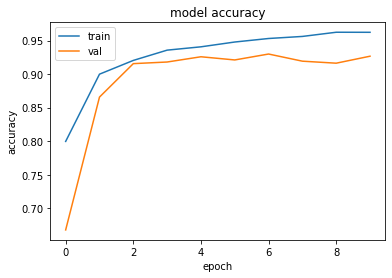

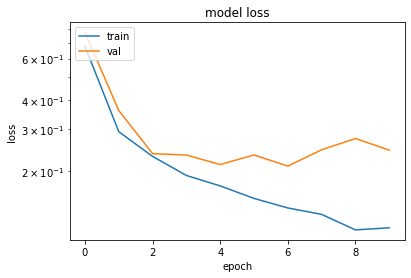

In [ ]:

history = history5.history

print (history)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale("log")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 6º Modelo - DenseNet121


La red convolucional densa (DenseNet) conecta cada capa con todas las demás de forma directa. Mientras que las redes convolucionales tradicionales con L capas tienen L conexiones -una entre cada capa.

ref(https://pytorch.org/hub/pytorch_vision_densenet/)

In [ ]:
input_image = Input(shape=(28, 28, 3))
resized_image = Lambda(lambda image: resize_images(x=image, height_factor=2, width_factor=2, data_format='channels_last'))(input_image) 
base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=resized_image)
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)
model6 = Model(inputs=base_model.input, outputs=predictions)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
model6.summary()

29097984/29084464 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 lambda_1 (Lambda)              (None, 56, 56, 3)    0           ['input_2[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 62, 62, 3)   0           ['lambda_1[0][0]']               
                                                                                                  
 conv1/conv (Conv2D)            (None, 28, 28, 64)   9408        ['zero_padding2d[0][0]']         
                           

In [ ]:
batch_size = 256
epochs = 10

history6 = model6.fit(x_train_2, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val_2, y_val))

Epoch 1/10
188/188 [==============================] - 111s 489ms/step - loss: 0.5187 - accuracy: 0.8337 - f1_m: 0.8297 - precision_m: 0.8831 - recall_m: 0.7897 - val_loss: 0.9250 - val_accuracy: 0.7653 - val_f1_m: 0.7621 - val_precision_m: 0.7849 - val_recall_m: 0.7407
Epoch 2/10
188/188 [==============================] - 84s 448ms/step - loss: 0.2568 - accuracy: 0.9143 - f1_m: 0.9141 - precision_m: 0.9326 - recall_m: 0.8964 - val_loss: 0.2545 - val_accuracy: 0.9105 - val_f1_m: 0.9119 - val_precision_m: 0.9279 - val_recall_m: 0.8965
Epoch 3/10
188/188 [==============================] - 84s 449ms/step - loss: 0.2096 - accuracy: 0.9300 - f1_m: 0.9297 - precision_m: 0.9429 - recall_m: 0.9168 - val_loss: 0.2082 - val_accuracy: 0.9231 - val_f1_m: 0.9245 - val_precision_m: 0.9345 - val_recall_m: 0.9148
Epoch 4/10
188/188 [==============================] - 84s 448ms/step - loss: 0.1759 - accuracy: 0.9399 - f1_m: 0.9400 - precision_m: 0.9498 - recall_m: 0.9304 - val_loss: 0.2284 - val_accuracy

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model6.evaluate(x_test_2, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)
print('Test f1_score:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)

Test loss: 0.3201328217983246
Test accuracy: 0.9088000059127808
Test f1_score: 0.9092434644699097
Test precision: 0.9155828356742859
Test recall: 0.9031549692153931


Las siguientes partes se han intentado, están al final porque daban errores y no podía seguir ejecutando la práctica. 

## Visualización de capas

In [ ]:
img = x_train[0]

img_tensor = np.expand_dims(img, axis=0)



print(img_tensor.shape)

(1, 28, 28, 1)


In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 24, 24, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 12, 12, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 12, 12, 64) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dropout_9')>]

In [ ]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [ ]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


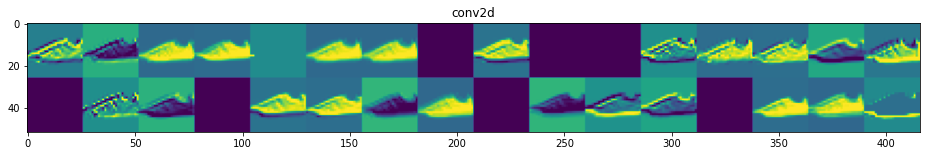

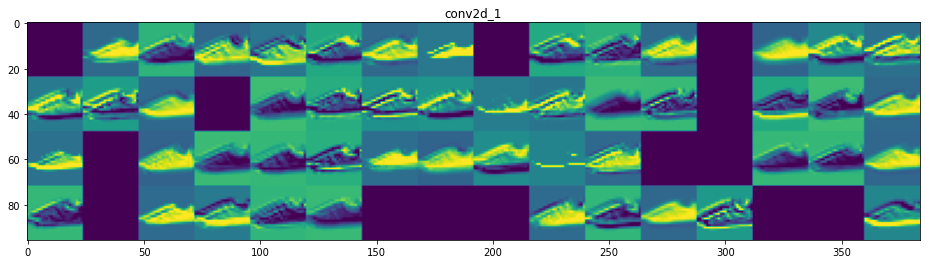

In [ ]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
  if (layer_name.find('conv') !=-1):
      n_features = layer_activation.shape[-1] # Number of features in the feature map
      size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
      n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                              :, :,
                                              col * images_per_row + row]
              channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, # Displays the grid
                          row * size : (row + 1) * size] = channel_image
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Data Augmentation 

In [ ]:
import pandas as pd

Este método se encarga de realizar cambios en las imagenes y generar un nuevo data con imagenes "editadas", giradas o movidas. Lo hago con el modelo 1 que es el más simple de todos y suele dar un accuracy de alrededor del 50, además es de los que mñas rápido termina. 

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [ ]:
epochs=10
model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(x_train) / 320, epochs=epochs)

Epoch 1/10
150/150 [==============================] - 12s 74ms/step - loss: 6.3374 - accuracy: 0.1760 - f1_m: 0.0613 - precision_m: 0.3098 - recall_m: 0.0350 - val_loss: 2.0701 - val_accuracy: 0.2940 - val_f1_m: 0.0109 - val_precision_m: 0.0475 - val_recall_m: 0.0061
Epoch 2/10
150/150 [==============================] - 11s 72ms/step - loss: 6.2410 - accuracy: 0.1927 - f1_m: 0.0600 - precision_m: 0.3392 - recall_m: 0.0338 - val_loss: 2.0578 - val_accuracy: 0.2991 - val_f1_m: 0.0103 - val_precision_m: 0.0446 - val_recall_m: 0.0058
Epoch 3/10
150/150 [==============================] - 11s 71ms/step - loss: 6.1508 - accuracy: 0.1931 - f1_m: 0.0532 - precision_m: 0.3389 - recall_m: 0.0296 - val_loss: 2.0325 - val_accuracy: 0.3146 - val_f1_m: 0.0086 - val_precision_m: 0.0379 - val_recall_m: 0.0049
Epoch 4/10
150/150 [==============================] - 11s 71ms/step - loss: 5.7847 - accuracy: 0.2077 - f1_m: 0.0539 - precision_m: 0.3305 - recall_m: 0.0300 - val_loss: 2.0213 - val_accuracy: 0.3

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',loss)
print('Test accuracy:', accuracy)


Test loss: 1.7389041185379028
Test accuracy: 0.6026999950408936


El resultado es algo mejor, llega al 60 por lo que podemos demostrar que dataaugmentation si que mejora un poco la precisión del modelo 

Otra forma similar de hacer lo mismo sacado del siguiente enlace: https://cnvrg.io/cnn-tensorflow/


In [ ]:
'''
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=( 28, 28, 1)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

epochs=10
history = model.fit(x_train_2, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_2, y_test))

'''

## Análisis de resultados

In [ ]:
df_h1 = pd.DataFrame(history1.history)
df_h1 = df_h1.rename(columns={"loss": "loss1", "accuracy":"accuracy1", "val_loss":"val_loss1", "val_accuracy":"val_accuracy1"})

df_h2 = pd.DataFrame(history2.history)
df_h2 = df_h2.rename(columns={"loss": "loss2", "accuracy":"accuracy2", "val_loss":"val_loss2", "val_accuracy":"val_accuracy2"})

df_h3 = pd.DataFrame(history3.history)
df_h3 = df_h3.rename(columns={"loss": "loss3", "accuracy":"accuracy3", "val_loss":"val_loss3", "val_accuracy":"val_accuracy3"})

df_h4 = pd.DataFrame(history4.history)
df_h4 = df_h4.rename(columns={"loss": "loss4", "accuracy":"accuracy4", "val_loss":"val_loss4", "val_accuracy":"val_accuracy4"})

df_h5 = pd.DataFrame(history5.history)
df_h5 = df_h5.rename(columns={"loss": "loss5", "accuracy":"accuracy5", "val_loss":"val_loss5", "val_accuracy":"val_accuracy5"})

df_h6 = pd.DataFrame(history6.history)
df_h6 = df_h6.rename(columns={"loss": "loss6", "accuracy":"accuracy6", "val_loss":"val_loss6", "val_accuracy":"val_accuracy6"})


df_h = pd.concat([df_h1,df_h2,df_h3,df_h4,df_h5,df_h6], axis=1)
df_h

,loss1,accuracy1,f1_m,precision_m,recall_m,val_loss1,val_accuracy1,val_f1_m,val_precision_m,val_recall_m,loss2,accuracy2,f1_m,precision_m,recall_m,val_loss2,val_accuracy2,val_f1_m,val_precision_m,val_recall_m,loss3,accuracy3,f1_m,precision_m,recall_m,val_loss3,val_accuracy3,val_f1_m,val_precision_m,val_recall_m,loss4,accuracy4,f1_m,precision_m,recall_m,val_loss4,val_accuracy4,val_f1_m,val_precision_m,val_recall_m,loss5,accuracy5,f1_m,precision_m,recall_m,val_loss5,val_accuracy5,val_f1_m,val_precision_m,val_recall_m,loss6,accuracy6,f1_m,precision_m,recall_m,val_loss6,val_accuracy6,val_f1_m,val_precision_m,val_recall_m
0,2.309587,0.085479,0.000000,0.000000,0.000000,14.127604,0.101000,0.099792,0.101000,0.098618,2.636696,0.251812,0.208254,0.318871,0.154920,78.771805,0.115333,0.115357,0.115367,0.115347,2.891851,0.127771,0.053493,0.137175,0.033375,69.414009,0.124500,0.124626,0.124696,0.124557,0.753816,0.722562,0.712961,0.794324,0.651346,2.399611,0.175333,0.000000,0.000000,0.000000,0.678008,0.799625,0.801097,0.845242,0.762384,0.777968,0.667583,0.654587,0.697911,0.616451,0.518688,0.833708,0.829666,0.883087,0.789665,0.924992,0.765250,0.762116,0.784939,0.740656
1,2.275094,0.137708,0.000000,0.000000,0.000000,10.564034,0.258750,0.258819,0.261690,0.256020,1.705894,0.450750,0.426488,0.581078,0.337600,318.642548,0.120750,0.120856,0.120856,0.120856,2.602994,0.179063,0.088132,0.222842,0.055188,165.821198,0.210250,0.210425,0.210439,0.210411,0.484150,0.821604,0.818919,0.860499,0.781375,0.965741,0.677583,0.633269,0.859385,0.502042,0.293603,0.899938,0.899973,0.920529,0.880423,0.361182,0.865750,0.855805,0.906753,0.810422,0.256844,0.914333,0.914120,0.932606,0.896443,0.254545,0.910500,0.911930,0.927949,0.896502
2,2.240052,0.194375,0.000000,0.000000,0.000000,9.764501,0.393083,0.393545,0.395568,0.391551,1.347876,0.554125,0.538274,0.674695,0.448284,592.186829,0.203333,0.203469,0.203469,0.203469,2.377160,0.230438,0.127912,0.304766,0.081292,169.084900,0.254417,0.254627,0.254627,0.254627,0.406110,0.849604,0.850363,0.880636,0.822224,0.808915,0.729000,0.729180,0.797138,0.672160,0.230479,0.920458,0.920757,0.936120,0.905959,0.236844,0.915667,0.914842,0.937035,0.893759,0.209600,0.930000,0.929662,0.942944,0.916826,0.208225,0.923083,0.924506,0.934496,0.914763
3,2.201238,0.243479,0.000000,0.000000,0.000000,9.820928,0.464667,0.464618,0.466156,0.463098,1.168978,0.607458,0.596196,0.714509,0.511843,736.216614,0.292167,0.292280,0.292280,0.292280,2.183882,0.276646,0.177148,0.386861,0.115375,169.016006,0.289500,0.289644,0.289644,0.289644,0.366493,0.865562,0.865972,0.892631,0.840945,1.233525,0.621417,0.620161,0.664780,0.581295,0.191247,0.935792,0.935322,0.946235,0.924701,0.233494,0.918083,0.918509,0.929970,0.907378,0.175878,0.939937,0.939980,0.949764,0.930435,0.228397,0.925750,0.926933,0.931857,0.922077
4,2.154754,0.290688,0.000000,0.000000,0.000000,10.959538,0.520000,0.520332,0.521426,0.519246,1.053974,0.641375,0.633354,0.742827,0.552298,759.270264,0.361167,0.361298,0.361298,0.361298,2.024390,0.324229,0.226680,0.450207,0.152104,172.424026,0.303667,0.303773,0.303773,0.303773,0.341291,0.875792,0.874982,0.898182,0.853038,1.651706,0.523333,0.521986,0.555782,0.492152,0.172547,0.940750,0.940713,0.950229,0.931433,0.212800,0.925917,0.926783,0.935616,0.918147,0.163269,0.943229,0.943402,0.952474,0.934550,0.209855,0.926833,0.926173,0.939213,0.913552
5,2.102962,0.332979,0.000000,0.000000,0.000000,12.739243,0.572250,0.572590,0.573198,0.571987,0.977939,0.663042,0.655845,0.755254,0.579870,771.424561,0.387167,0.387289,0.387289,0.387289,1.889194,0.365792,0.273594,0.502333,0.188729,172.544815,0.322500,0.322640,0.322640,0.322640,0.322537,0.882688,0.881898,0.903469,0.861411,3.115910,0.390583,0.391714,0.406512,0.378004,0.152685,0.947917,0.948535,0.957101,0.940160,0.233811,0.921167,0.921727,0.928681,0.914905,0.144773,0.949437,0.949155,0.956117,0.942320,0.411043,0.862000,0.862441,0.870336,0.854721
6,2.040483,0.365000,0.000000,0.000000,0.000000,15.461655,0.592583,0.592718,0.593029,0.592408,0.91

Filtros para poder analziar cada variable de forma independiente 

In [ ]:
loss_df = [col for col in df_h if col.startswith('loss')]
accuracy_df = [col for col in df_h if col.startswith('accuracy')]
val_loss_df = [col for col in df_h if col.startswith('val_loss')]
val_accuracy_df = [col for col in df_h if col.startswith('val_accuracy')]


In [ ]:
df_h[loss_df].describe()

,loss1,loss2,loss3,loss4,loss5,loss6
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.100045,1.229674,2.052606,0.381959,0.221484,0.194350
std,0.167746,0.567511,0.457060,0.146005,0.170033,0.123298
min,1.811453,0.796029,1.510722,0.273889,0.112139,0.103332
25%,1.987614,0.878915,1.704291,0.292991,0.132696,0.130523
50%,2.128858,1.015956,1.956792,0.331914,0.162616,0.154021
75%,2.230349,1.303152,2.328841,0.396206,0.220671,0.201170
max,2.309587,2.636696,2.891851,0.753816,0.678008,0.518688


In [ ]:
df_h[accuracy_df].describe()

,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.288160,0.597725,0.328490,0.860146,0.927881,0.934673
std,0.119396,0.146754,0.122413,0.054262,0.049160,0.038615
min,0.085479,0.251812,0.127771,0.722562,0.799625,0.833708
25%,0.206651,0.567458,0.241990,0.853594,0.924292,0.932484
50%,0.311833,0.652208,0.345010,0.879240,0.944333,0.946333
75%,0.383781,0.693010,0.424146,0.892849,0.955479,0.954760
max,0.431854,0.719938,0.485271,0.900250,0.962500,0.964458


In [ ]:
df_h[val_loss_df].describe()

,val_loss1,val_loss2,val_loss3,val_loss4,val_loss5,val_loss6
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,14.996166,633.297893,162.155050,1.970616,0.303116,0.322612
std,5.537204,242.121426,32.800712,0.969425,0.172330,0.219587
min,9.764501,78.771805,69.414009,0.808915,0.209528,0.208225
25%,10.662910,628.194275,169.033230,1.338070,0.233574,0.229612
50%,13.433424,761.499451,172.484421,1.819826,0.240889,0.239331
75%,17.842721,770.062881,174.446438,2.285453,0.267490,0.271494
max,25.734808,775.023926,178.879776,3.948125,0.777968,0.924992


In [ ]:
df_h[val_accuracy_df].describe()

,val_accuracy1,val_accuracy2,val_accuracy3,val_accuracy4,val_accuracy5,val_accuracy6
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.471983,0.318208,0.290675,0.508883,0.890658,0.899583
std,0.173244,0.127836,0.075867,0.178574,0.080461,0.050967
min,0.101000,0.115333,0.124500,0.175333,0.667583,0.765250
25%,0.410979,0.225542,0.263188,0.423771,0.915833,0.912146
50%,0.546125,0.374167,0.313083,0.536917,0.918708,0.919667
75%,0.597458,0.418708,0.338625,0.625167,0.924729,0.925083
max,0.612917,0.437417,0.371083,0.729000,0.930000,0.926833


## CONCLUSIONES 

En los resultados finales se observa como los modelos que mejores resultados muestran son los que utilizan arquitecturas como MobileNet. Tiene sentido ya que como vimos en clase son modelos preentrenados y preparados, no es sorprendente que sean mejores que nuestros modelos. 

Si ponemos la atención en lo que ocurre dentro de los **4 primeros modelos** vemos lo siguiente:

- La función de activación tiene un efecto importante. Esto lo vemos en el modelo 4 y 42 que están basados en los anteriores 2 y 3 cambiando la función de activación y los resultados del accuracy empeoran bastante. (El modelo 4 está basado en el 3 y el modelo 42 en el 2.) 

- Añadirle profundidad al modelo mejora su rendimiento. Si miramos el 1 y el 2, pasamos de un 50 a un 70 de accuracy. 

- Si pasamos al tercer modelo, en el que "mejoramos" el segundo añadiendole capas del tipo Max Pooling y dropout la realidad es que esto no ocurre, el modelo empeora bajando de nuevo a un 50 de accuracy. El dropout no tiene porque ser siempre postivo y las capas que se añaden tienen que relaizarse con cierto conocimiento porque añadir más puede derivar en empeorar el modelo. Es por esto que decimos que utilizar modelos preentrenados y **arquitecturas puede ser mejor** idea ya que los modelos están creados con más detalle y probados en muchos casos. 


Una de las cosas que aprendimos en clase que se refleja bien en la práctica es el uso de los **tres subsets de datos --> train, validate y test.** 

Entrenamos el modelo con train, conjunto con mayor cantidad de datos y lo evaluamos en el mismo instante con evaluate. 

Para sacar las métricas no usamos estos sets, usamos test, datos que nuestro modelo no ha visto hasta el momento logrando de esta manera evaluar de forma más precisa la eficiencia del modelo. 

La parte de **DataAugmentation** tiene la finalidad de mejorar los resultados ya que permite realizando pequeños cambios en los datos como rotaciones, desplazamientos a la derecha o izquierda entre otras cosas aumentar nuestro conjunto de datos de entrenamiento. Esta parte nos permite mejorar la precision de los modelos. 


Otro de los puntos a tener en cuenta es el tiempo. Los modelos más profundos, el que más en este caso DenseNet121 tardan bastante. Algunos llegando a los 20/30 minutos lo que tiene sentido pero también es algo a tener en cuenta a la hora de decidir que modelo preferimos. Si dos tienen una accuracy similares podemos considerar cual es el mejor dependiendo del tiempo que tarda en ejecutarse y más preciso el tiempo que tarda en cada epoch. 

